# Analyzing VCT 2021
## Objectives
1. Analyzing the winning team (see the journey of winning team across the tournament)
2. Analyzing the agent trends across map with respect to win rate
3. Analyzing the team's win rate across maps
4. Analyzing the individual performance of player across maps and entire tournament
5. Maybe Rank the players (top 10 overall tournament)

### Structure Of VCT
to analyze the tournament we need to first understand how the structure of tournament works<br>
Below is the basic flow of the tournament <br><br>
<img src="../assets/images/tournament_structure.png" alt="vct Structure" width="500">

**Note : the dataset contains all the data from the internation league to valorant championship**<br>
it would be a tedious task to screen each and every match and analyze , we will try to explore our data , see what the data says<br>
we will try to develop methodology to go forward with the analysis process

## Initial Exploratoin and Understanding of Data
##### we will try to understand the data and know what part of data lies where so that we have a good idea then we will try to work towards the objectives

In [1]:
# necessary imoprts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_style('ticks')

valorant_hex_codes = [
    '#FD4556',  # Valorant Red
    '#0F1923',  # Dark Gunmetal
    '#ECE8E1',  # Off-White
    '#73DFF6',  # Glacial Blue
    '#FFD700',  # Golden Yellow
    '#7B68EE'   # Royal Purple
]

### Draft phase
Key elements of the draft phase:

Map Bans: Before the agent selection, teams take turns banning maps they don't want to play on. This allows them to eliminate maps where they feel weak or where the opposing team excels.

Agent Picks and Bans: After the map is chosen, teams select their agents. In some competitive formats, there is also a "ban" phase, where teams can prevent the other team from picking certain agents. This adds another layer of strategy, as teams can remove agents that counter their own composition or that are particularly strong in the hands of a specific opponent.

In [2]:
draft_phase = pd.read_csv('../data/raw/vct_2021/matches/draft_phase.csv')

In [3]:
draft_phase.head()

,Tournament,Stage,Match Type,Match Name,Team,Action,Map
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,FULL SENSE,ban,Fracture
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Vision Strikers,ban,Ascent
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,FULL SENSE,pick,Haven
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Vision Strikers,pick,Breeze
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,FULL SENSE,ban,Bind


In [4]:
draft_phase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  3378 non-null   object
 1   Stage       3378 non-null   object
 2   Match Type  3378 non-null   object
 3   Match Name  3378 non-null   object
 4   Team        3378 non-null   object
 5   Action      3378 non-null   object
 6   Map         3378 non-null   object
dtypes: object(7)
memory usage: 184.9+ KB


In [5]:
draft_phase.isnull().sum()

Tournament    0
Stage         0
Match Type    0
Match Name    0
Team          0
Action        0
Map           0
dtype: int64

no null values are present , so need of handling them seperately

<Axes: xlabel='Map', ylabel='count'>

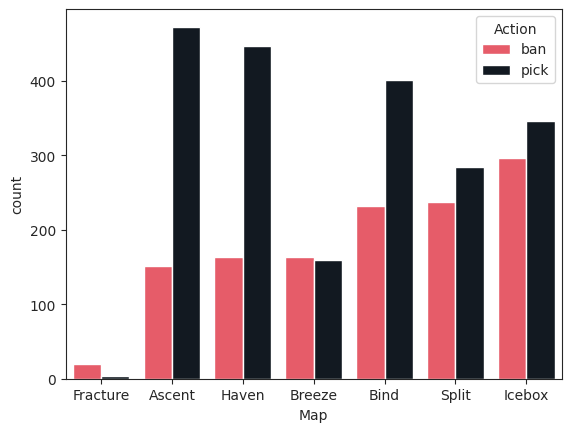

In [6]:
# lets see which map is teams favourite
# for a particular map we will need to see how many times it was banned or picked
# A list containing the direct hex codes for the Valorant color palette
sns.countplot(data = draft_phase , x = 'Map' , hue = 'Action' , palette=valorant_hex_codes[:2])

we can see that fracture was one of the most hated and ascent and haven being most loved, the data confirms the trendk

In [7]:
# lets see how many tournaments took place to get a brief idea
draft_phase['Tournament'].unique()

array(['Valorant Champions 2021',
       'Champions Tour North America: Last Chance Qualifier',
       'Champions Tour South America: Last Chance Qualifier',
       'Champions Tour EMEA: Last Chance Qualifier',
       'Champions Tour Asia-Pacific: Last Chance Qualifier',
       'Strike Arabia Championship: Finals',
       'Valorant Champions Tour Stage 3: Masters Berlin',
       'Oceania Tour: Championship', 'Valorant Conquerors Championship',
       'Champions Tour SEA Stage 3: Challengers Playoffs',
       'Champions Tour Brazil Stage 3: Challengers Playoffs',
       'Champions Tour Stage 3: EMEA Challengers Playoffs',
       'Champions Tour LATAM Stage 3: Challengers Playoffs',
       'Champions Tour North America Stage 3: Challengers Playoffs',
       'Oceania Tour: Stage 03',
       'Champions Tour Korea Stage 3: Challengers',
       'Champions Tour Japan Stage 3: Challengers Playoffs',
       'Champions Tour Brazil Stage 3: Challengers 3',
       'Champions Tour Indonesia Stage 3

seeing so much data is bit overwhelming <br>
**note : from this point we will do the analysis for the winning team , winning team is been chosen here because they would have technically played the entire tournament**

In [8]:
# we have to first find which team won
# 'Acend' won the finals
# we have to find this team and its id
team_ids = pd.read_csv('../data/raw/vct_2021/ids/teams_ids.csv')

In [9]:
team_ids[team_ids['Team'].str.startswith('A')]

,Team,Team ID
14,Acend,3531.0
25,Australs,719.0
31,Anubis Gaming,1466.0
67,Alterfox Esports,1596.0
96,Aquiver,5500.0
...,...,...
2682,Akademus Esport,252.0
2694,Almost International,2346.0
2723,AMG Gaming,3413.0
2725,Area 51,3416.0


In [10]:
# we found the team
team_id = 3531
team_name = 'acend'

In [11]:
# now we will have to find all the small tournaments the team played in
# there can be many ways you can gather this , but i am using the maps_played.csv
maps_played = pd.read_csv('../data/raw/vct_2021/matches/maps_played.csv')
maps_played.head()

,Tournament,Stage,Match Type,Match Name,Map
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Breeze
2,Valorant Champions 2021,Group Stage,Opening (C),Team Vikings vs Crazy Raccoon,Icebox
3,Valorant Champions 2021,Group Stage,Opening (C),Team Vikings vs Crazy Raccoon,Haven
4,Valorant Champions 2021,Group Stage,Opening (D),FNATIC vs Cloud9,Icebox


In [12]:
acend_matches = maps_played[maps_played['Match Name'].str.casefold().str.contains(team_name)]

In [13]:
acend_matches[acend_matches['Tournament'] == 'Valorant Champions 2021']

,Tournament,Stage,Match Type,Match Name,Map
26,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox
27,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Bind
28,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Breeze
36,Valorant Champions 2021,Group Stage,Winner's (A),Acend vs Envy,Ascent
37,Valorant Champions 2021,Group Stage,Winner's (A),Acend vs Envy,Bind
51,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox
52,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Breeze
61,Valorant Champions 2021,Playoffs,Semifinals,Acend vs Team Liquid,Bind
62,Valorant Champions 2021,Playoffs,Semifinals,Acend vs Team Liquid,Split
66,Valorant Champions 2021,Playoffs,Grand Final,Acend vs Gambit Esports,Breeze


ascend did play 14 matches this confirms that we are on right track<br>
now we will extract all the small tournaments they did play<br>

In [14]:
tournaments_played = acend_matches['Tournament'].unique()

In [15]:
tournaments_played

array(['Valorant Champions 2021',
       'Valorant Champions Tour Stage 3: Masters Berlin',
       'Champions Tour Stage 3: EMEA Challengers Playoffs',
       'Champions Tour Europe Stage 3: Challengers 1',
       'Champions Tour Europe Stage 2: Challengers 2',
       'Champions Tour Europe Stage 2: Challengers 1',
       'Champions Tour Europe Stage 1: Masters'], dtype=object)

now thats better , analyzing regional tournament will expose us to better understanding of data which we can then extend to all of the teams

In [16]:
# only gather info about the tournaments that the winning team played
draft_phase = draft_phase[(draft_phase['Tournament'].isin(tournaments_played)) & (draft_phase['Match Name'].str.casefold().str.contains(team_name))]

In [17]:
draft_phase

,Tournament,Stage,Match Type,Match Name,Team,Action,Map
60,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Keyd Stars,ban,Ascent
61,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Acend,ban,Haven
62,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Keyd Stars,pick,Icebox
63,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Acend,pick,Bind
64,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Keyd Stars,ban,Fracture
...,...,...,...,...,...,...,...
3305,Champions Tour Europe Stage 2: Challengers 1,Qualifier Play-In,Round of 16,Acend vs Giants Gaming,Acend,pick,Haven
3330,Champions Tour Europe Stage 2: Challengers 1,Qualifier Play-In,Quarterfinals (Seeding),Team Vitality vs Acend,Team Vitality,ban,Bind
3331,Champions Tour Europe Stage 2: Challengers 1,Qualifier Play-In,Quarterfinals (Seeding),Team Vitality vs Acend,Acend,ban,Icebox
3332,Champions Tour Europe Stage 2: Challengers 1,Qualifier Play-In,Quarterfinals (Seeding),Team Vitality vs Acend,Acend,pick,Ascent


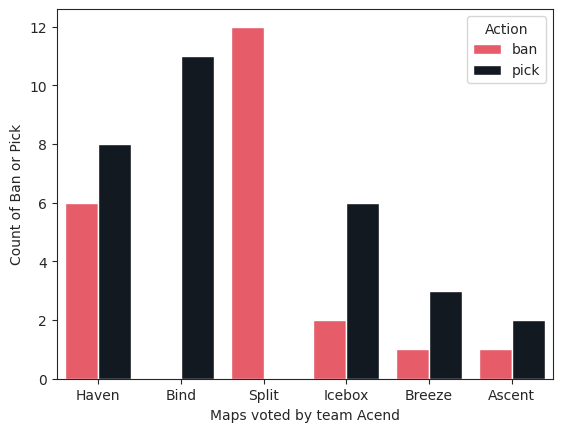

In [18]:
# lets see which was the favourite map of team acend
draft_phase[draft_phase['Team'] == 'Acend'].groupby('Action')
sns.countplot(data = draft_phase[draft_phase['Team'] == 'Acend'] , x = 'Map' , hue = 'Action' , palette=valorant_hex_codes[:2]);
plt.xlabel('Maps voted by team Acend')
plt.ylabel('Count of Ban or Pick')
plt.show()

### Analyze the Eco Rounds played by team Acend
here we will try to see how well the team played 

In [19]:
eco_rounds = pd.read_csv('../data/raw/vct_2021/matches/eco_rounds.csv')

In [20]:
eco_rounds.head()

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,Vision Strikers,3.9k,0.4k,Eco: 0-5k,Win
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,FULL SENSE,3.4k,0.2k,Eco: 0-5k,Loss
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,Vision Strikers,14.4k,5.2k,Semi-buy: 10-20k,Win
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,FULL SENSE,2.4k,8.4k,Eco: 0-5k,Loss
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,Vision Strikers,17.6k,15.2k,Semi-buy: 10-20k,Loss


In [21]:
# we want rounds only played by team acend
eco_rounds = eco_rounds[eco_rounds['Team'].str.casefold().str.contains(team_name)]

In [22]:
eco_rounds.head()

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
1086,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,1,Acend,4.1k,0.2k,Eco: 0-5k,Loss
1088,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,2,Acend,4.0k,7.1k,Eco: 0-5k,Loss
1090,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,3,Acend,21.1k,0.9k,Full buy: 20k+,Loss
1092,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,4,Acend,8.0k,8.8k,Semi-eco: 5-10k,Loss
1094,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,5,Acend,23.7k,1.6k,Full buy: 20k+,Win


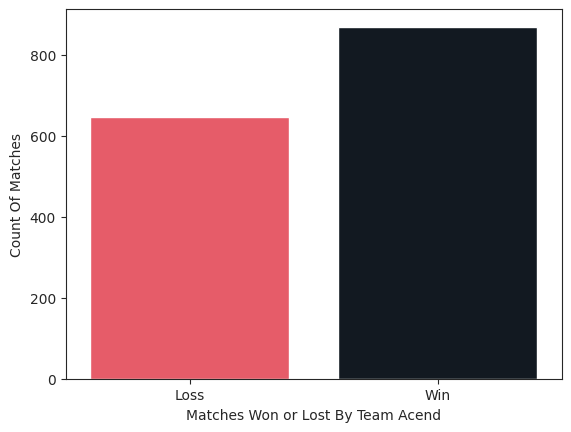

In [23]:
# lets see how many of them were won by the team
sns.countplot(data = eco_rounds , x = 'Outcome' , hue = 'Outcome'  , palette=valorant_hex_codes[:2])
plt.xlabel('Matches Won or Lost By Team Acend')
plt.ylabel('Count Of Matches')
plt.show()

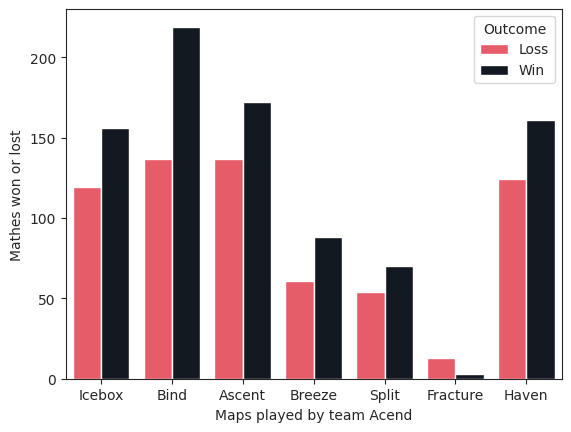

In [24]:
# lets see whats the winning or lossing rate with respect to maps
sns.countplot(data = eco_rounds , x = 'Map' , hue = 'Outcome' , palette=valorant_hex_codes[:2])
plt.xlabel('Maps played by team Acend')
plt.ylabel('Mathes won or lost')
plt.show()

In [25]:
# lets see what buy made them won most of the matches
eco_rounds['Type'].unique()

array(['Eco: 0-5k', 'Full buy: 20k+', 'Semi-eco: 5-10k',
       'Semi-buy: 10-20k'], dtype=object)

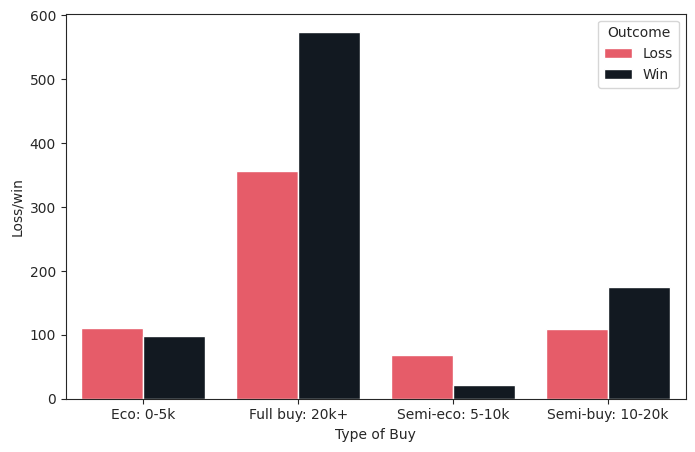

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data = eco_rounds , x = 'Type', hue = 'Outcome' , palette=valorant_hex_codes[:2])
plt.xlabel('Type of Buy')
plt.ylabel('Loss/win')
plt.show()

In [27]:
# lets see the winning rate with respect to which round they did eco round
eco_rounds['Round Number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

<Axes: xlabel='Round Number', ylabel='count'>

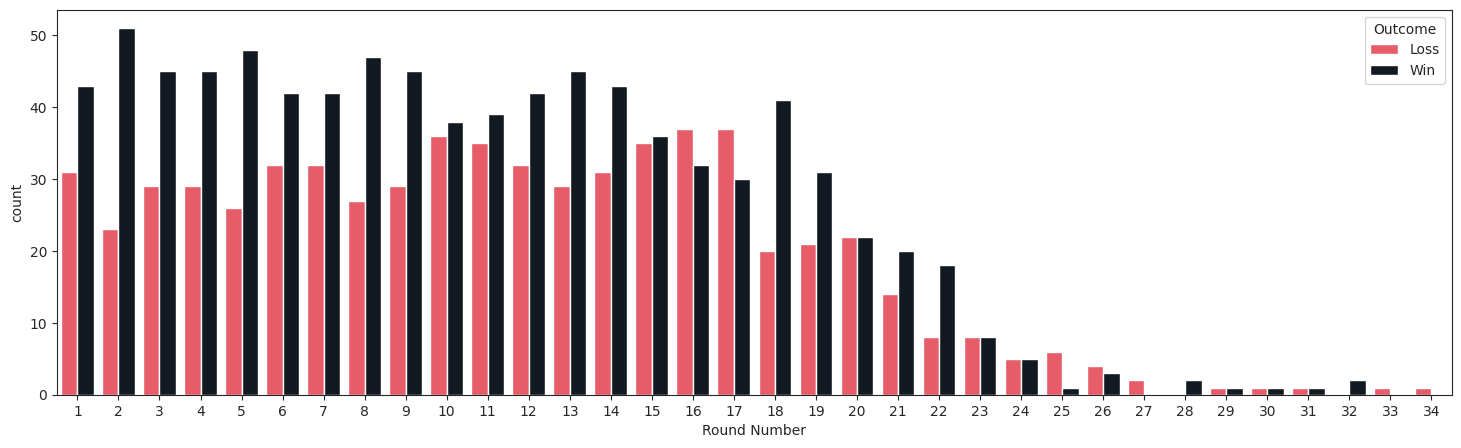

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(data = eco_rounds , x = 'Round Number' , hue = 'Outcome' , palette=valorant_hex_codes[:2])

In [29]:
eco_stats = pd.read_csv('../data/raw/vct_2021/matches/eco_stats.csv')

In [30]:
eco_stats = eco_stats[eco_stats['Team'].str.casefold().str.contains(team_name)]

In [31]:
eco_stats.head()

,Tournament,Stage,Match Type,Match Name,Map,Team,Type,Initiated,Won
360,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,Acend,Pistol Won,NaN,1
361,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,Acend,Eco (won),3.0,1
362,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,Acend,$ (won),3.0,0
363,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,Acend,$$ (won),3.0,2
364,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,Icebox,Acend,$$$ (won),13.0,6


In [32]:
eco_stats.describe()

,Initiated,Won
count,416.000000,520.000000
mean,7.377404,3.734615
std,8.631373,4.993517
min,0.000000,0.000000
25%,2.000000,1.000000
50%,4.000000,2.000000
75%,10.000000,4.000000
max,63.000000,35.000000


In [33]:
eco_stats.groupby('Type')['Won'].sum()

Type
$ (won)         44
$$ (won)       354
$$$ (won)     1162
Eco (won)      204
Pistol Won     178
Name: Won, dtype: int64

In [34]:
kills = pd.read_csv('../data/raw/vct_2021/matches/kills.csv')

In [35]:
kills.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,FULL SENSE,PTC,3.0,7.0,-4.0,All Kills
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,FULL SENSE,LAMMYSNAX,5.0,1.0,4.0,All Kills
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,FULL SENSE,ChAlalala,0.0,3.0,-3.0,All Kills
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,FULL SENSE,JohnOlsen,5.0,1.0,4.0,All Kills
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,FULL SENSE,SuperBusS,9.0,6.0,3.0,All Kills


In [36]:
kills = kills[kills['Player Team'] == 'Acend']

In [37]:
kills.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
2700,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,All Maps,Acend,zeek,Keyd Stars,heat,9.0,13.0,-4.0,All Kills
2701,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,All Maps,Acend,zeek,Keyd Stars,murizzz,9.0,6.0,3.0,All Kills
2702,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,All Maps,Acend,zeek,Keyd Stars,mwzera,11.0,4.0,7.0,All Kills
2703,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,All Maps,Acend,zeek,Keyd Stars,JhoW,6.0,5.0,1.0,All Kills
2704,Valorant Champions 2021,Group Stage,Opening (A),Acend vs Keyd Stars,All Maps,Acend,zeek,Keyd Stars,v1xen,12.0,7.0,5.0,All Kills


In [38]:
kills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 2700 to 905399
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tournament    5700 non-null   object 
 1   Stage         5700 non-null   object 
 2   Match Type    5700 non-null   object 
 3   Match Name    5700 non-null   object 
 4   Map           5700 non-null   object 
 5   Player Team   5700 non-null   object 
 6   Player        5700 non-null   object 
 7   Enemy Team    5700 non-null   object 
 8   Enemy         5700 non-null   object 
 9   Player Kills  3501 non-null   float64
 10  Enemy Kills   3501 non-null   float64
 11  Difference    3501 non-null   float64
 12  Kill Type     5700 non-null   object 
dtypes: float64(3), object(10)
memory usage: 623.4+ KB


In [39]:
kills['Player'].unique()
# okay so there were total 6 players who played for Acend

array(['zeek', 'Kiles', 'BONECOLD', 'starxo', 'cNed', 'koldamenta'],
      dtype=object)

In [40]:
kills['Map'].unique()

array(['All Maps', 'Icebox', 'Bind', 'Ascent', 'Breeze', 'Split',
       'Fracture', 'Haven'], dtype=object)

In [41]:
kills['Kill Type'].unique()

array(['All Kills', 'First Kills', 'Op Kills'], dtype=object)

In [42]:
# lets see scenarios where the kill diff is positive
kills[kills['Difference'] > 0][['Player' , 'Difference']].sort_values(by=['Difference'] , ascending=[False])                                           

,Player,Difference
476628,BONECOLD,17.0
476632,cNed,16.0
905117,cNed,16.0
802809,cNed,16.0
30466,starxo,13.0
...,...,...
905354,starxo,1.0
905349,Kiles,1.0
905348,Kiles,1.0
905347,Kiles,1.0


here we dont have information for every round but rather every match , it is difficult to seperate then based on rounds because the entire row remains same , the stage , group , tournament etc.

In [43]:
# kills stats
kills_stats = pd.read_csv('../data/raw/vct_2021/matches/kills_stats.csv')

In [44]:
kills_stats.head()

,Tournament,Stage,Match Type,Match Name,Map,Team,Player,Agents,2k,3k,4k,5k,1v1,1v2,1v3,1v4,1v5,Econ,Spike Plants,Spike Defuses
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,stax,"breach, skye",3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,19.0,0.0
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,Rb,"skye, sova",6.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,64.0,1.0,1.0
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,k1Ng,"cypher, killjoy",3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0.0,1.0
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,BuZz,jett,10.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,88.0,0.0,1.0
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,All Maps,Vision Strikers,MaKo,"astra, viper",2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,55.0,1.0,0.0


In [49]:
kills = kills_stats[kills_stats['Team'] == 'Acend']

In [ ]:
kills.groupby('Player')['Player'].count()
# represents the total games/matches player by each of the players

Player
BONECOLD      104
Kiles         104
cNed          104
koldamenta     35
starxo        104
zeek           69
Name: Player, dtype: int64

In [55]:
kills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 362 to 120238
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tournament     520 non-null    object 
 1   Stage          520 non-null    object 
 2   Match Type     520 non-null    object 
 3   Match Name     520 non-null    object 
 4   Map            520 non-null    object 
 5   Team           520 non-null    object 
 6   Player         520 non-null    object 
 7   Agents         520 non-null    object 
 8   2k             502 non-null    float64
 9   3k             336 non-null    float64
 10  4k             137 non-null    float64
 11  5k             19 non-null     float64
 12  1v1            126 non-null    float64
 13  1v2            82 non-null     float64
 14  1v3            13 non-null     float64
 15  1v4            4 non-null      float64
 16  1v5            0 non-null      float64
 17  Econ           520 non-null    float64
 18  Spike Plan

In [ ]:
kills.isnull().sum()

Tournament         0
Stage              0
Match Type         0
Match Name         0
Map                0
Team               0
Player             0
Agents             0
2k                18
3k               184
4k               383
5k               501
1v1              394
1v2              438
1v3              507
1v4              516
1v5              520
Econ               0
Spike Plants       0
Spike Defuses      0
dtype: int64

we can see that many of the values specifically for the kills 2k , 3k .. 1v5 have null values , its expected since all players wont always do a 2k , 3k 1v5 etc. <br>
So basically we can say that Nan's here would represent 0.